# P.95 NexworkX

In [3]:
% %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

(-0.05620389743585216, 0.5231731245280443, -0.10500000000000001, 1.105)

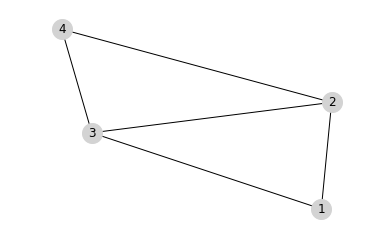

In [16]:
G  = nx.Graph()
# G  = nx.DiGraph()

vlist = [1,2,3,4]
elist = [(1,1), (1,1), (2,1), (1,2), (1,3), (2,3), (2,4), (3,4)]

G.add_nodes_from(vlist)
G.add_edges_from(elist)

nx.draw_networkx(G, node_color='lightgrey', node_size=400)
plt.axis('off')

In [14]:
print('Gの頂点のリスト:', G.nodes())
print('Gの頂点数:', G.number_of_nodes())
print('Gの頂点1に隣接する頂点のリスト:', [v for v in nx.all_neighbors(G,node=1)])

Gの頂点のリスト: [1, 2, 3, 4]
Gの頂点数: 4
Gの頂点1に隣接する頂点のリスト: [1, 2, 3]


# 接続行列

In [21]:
G = nx.MultiGraph()
G.add_edges_from([(1,2), (1,3), (3,1), (2,3), (2,2)])
A = nx.adjacency_matrix(G) # 隣接行列 a(i,j):ノードi,jが隣接しているエッジ本数
M = nx.incidence_matrix(G) # 接続行列 m(i,j):ノードiがエッジjに接続されている場合1

print('A =',A.toarray())
print('M =',M.toarray())

A = [[0 1 2]
 [1 1 1]
 [2 1 0]]
M = [[1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1.]]


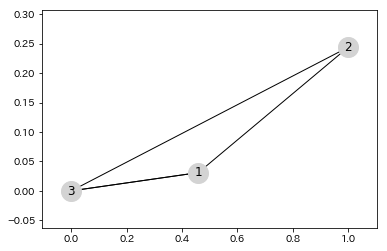

In [22]:
nx.draw_networkx(G, node_color='lightgrey', node_size=400)

# 完全グラフ・2部グラフ・サイクル

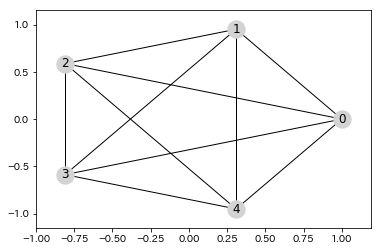

In [25]:
G = nx.complete_graph(5)
#p = nx.spring_layout(G, iterations=100)
p = nx.circular_layout(G)
nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=300)

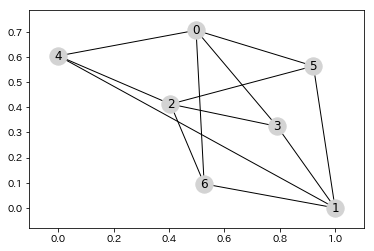

In [27]:
m,n = (3,4)
G = nx.complete_bipartite_graph(m,n)
nx.draw_networkx(G, node_color='lightgrey', node_size=300)

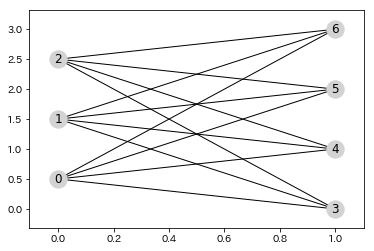

In [29]:
p = {}
for i in range(m):
    p[i] = (0,i+0.5)
for i in range(n):
    p[m+i] = (1,i)
nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=300)

# P.105 木と最適化

# P.107 最小全域木問題

In [52]:
# Primのアルゴリズム
def prim(G):
    """
    T:最小全域木のエッジ集合
    S:エッジ集合Tに接続しているノード集合
    """
    V = [v for v in G.nodes()]
    n = len(V)
    T = []
    S = [V[0]] # 初期ノードを1つ選択
    # 全ノードがSに含まれるまで反復
    while len(S) < n:
        # エッジのうち片方のノードのみがSに含まれるモノを抽出する
        candidates = []
        for u in S:
            for v,w in G[u].items():
                if not (v in S):
                    candidates.append((u,v,w['weight']))
        # 重みが最小のエッジを選ぶ
        (u,v,w) = min(candidates, key=lambda x:x[2])
        S += [v]
        T += [(u,v)]
    return T

In [53]:
weighted_elist = [
    ('D','G', 195), ('D', 'R', 130), ('D', 'S', 260),
    ('G','R', 195), ('G', 'N', 166), ('R', 'S', 132),
    ('R','M', 114), ('R', 'N', 227), ('M', 'S', 114),
    ('M','P', 114), ('M', 'N', 166), ('N', 'P', 195),
    ('P','S', 114)
]
pos = {'D':(0,15), 'G':(11,19), 'N':(17,12), 'R':(6,9),
       'M':(10,4), 'P':(15, 0), 'S':( 5, 0),}

(-1.7850000000000001, 18.785, -1.995, 20.994999999999997)

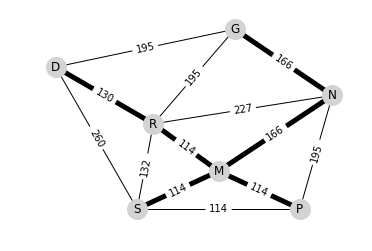

In [59]:
G  = nx.Graph()
G.add_weighted_edges_from(weighted_elist)

# Edgeラベル
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
# 最小の重みで全ノードをつなぐパスを算出
mst = prim(G)

nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=400)
nx.draw_networkx_edges(G, pos=pos, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)

plt.axis('off')

(-1.7850000000000001, 18.785, -2.113033480500367, 21.113033480500366)

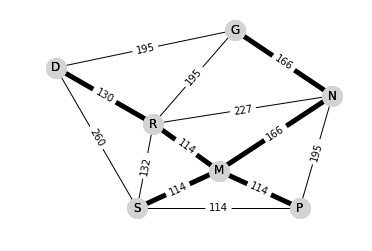

In [61]:
# NetworkXの関数で最小全域木問題を解く
Gmst = nx.minimum_spanning_tree(G=G)# グラフオブジェクトが返ってくる
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=400)
nx.draw_networkx(Gmst, pos=pos, node_color='lightgrey', node_size=400, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)
plt.axis('off')

# P.109 木とグラフ探索

In [62]:
import collections

# P.112 深さ優先探索

In [91]:
def dfs(G):
    """
    Graphに対するDepthFirstSearch(深さ優先探索)を行い
    探索したEdge(u,v)を探索が完了した順に格納して返す
    """
    
    V = [v for v in G.nodes()]
    start = V[0]
    
    S = collections.deque([start]) # Stack
    flagged = {v:False for v in G.nodes()}
    T = [] # 通った枝のリスト
    
    while len(S) != 0:
        t = S[-1] # Stackの一番上を参照 ※取り出してはいない
        flagged[t] = True
        # print('Flagged', t)
        # tに接続されたエッジのうち、逆側のノードが、まだ一度も通っていないモノを集める
        edges = [(u,v) for (u,v) in G.edges(t) if not (flagged[v])]
        
        if edges != []:
            (u,v) = edges[0]
            S.append(v)
            T.append((u,v))
            # print('Append', (u,v))
        else:
            S.pop()
    return T

(-0.31500000000000006, 3.315, -0.21000000000000002, 2.21)

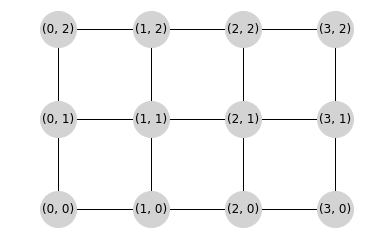

In [92]:
G = nx.grid_2d_graph(4,3)
p = {v:v for v in G.nodes()}

nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=1300, with_labels=True)
plt.axis('off')

(-0.31500000000000006, 3.315, -0.21000000000000002, 2.21)

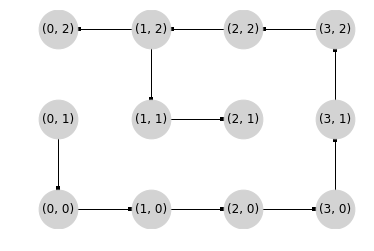

In [93]:
dfs_edges = dfs(G)
DG = nx.DiGraph()
DG.add_edges_from(dfs_edges)
nx.draw_networkx(DG, edgelist=dfs_edges, pos=p, node_color='lightgrey', node_size=1500, with_labels=True)
plt.axis('off')

# P.121 最短路問題

# P.123 Dijkstra法

In [154]:
weighted_elist = [
    ('v1','v2', 8), ('v1','v3',16), ('v2','v3', 7),
    ('v2','v4', 6), ('v2','v5',19), ('v3','v4', 5),
    ('v3','v6', 8), ('v4','v5',14), ('v4','v6',14),
    ('v5','v6',11), ('v5','v7', 7), ('v6','v7', 7),
]
p = {'v1':(0,1), 'v2':(1,2), 'v3':(1,0), 'v4':(2,1), 
     'v5':(3,2), 'v6':(3,0), 'v7':(4,1),}

In [155]:
def get_shortest_path_edges_to_all_nodes(G):
    """
    Dijkstra法を用いて、グラフ内の全ノードへの最短パスに使うEdgeを出力
    """
    s = 'v1' #スタートノード
    nodes = set(G.nodes()) - {s}
    T = set({})

    # スタートノード以外の全ノードへの最短経路を探索
    for v in nodes:
        print('Node=', v, end=' : ')
        # Graphにおけるノードsからvまでの最短パスを、通るノードのリストとして返す
        sp = nx.dijkstra_path(G,s,v) 
        # 最短パスを個別のEdgeに分解する
        sp_edge_set = {tuple(x) for x in np.array([sp[:-1], sp[1:]]).T}
        print('Path=', sp_edge_set)
        #和集合を取る
        T = T.union(sp_edge_set)

    T = list(T)
    return T

Node= v4 : Path= {('v2', 'v4'), ('v1', 'v2')}
Node= v7 : Path= {('v3', 'v6'), ('v2', 'v3'), ('v6', 'v7'), ('v1', 'v2')}
Node= v2 : Path= {('v1', 'v2')}
Node= v5 : Path= {('v1', 'v2'), ('v2', 'v5')}
Node= v6 : Path= {('v3', 'v6'), ('v2', 'v3'), ('v1', 'v2')}
Node= v3 : Path= {('v2', 'v3'), ('v1', 'v2')}


(-0.42000000000000004, 4.42, -0.21000000000000002, 2.21)

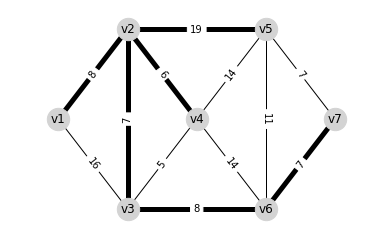

In [156]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
edge_labels = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

T = get_shortest_path_edges_to_all_nodes(G)

nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=500)
nx.draw_networkx_edges(G, pos=p, edgelist=T, node_color='lightgrey', width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=edge_labels)
plt.axis('off')

# P.127 オイラー閉路と郵便配達人問題
- オイラーグラフ：オイラー閉路（一筆書きで元の点に帰ってこれる）からなるグラフ
- 準オイラーグラフ：オイラー閉路ではないが、オイラー路（一筆書きができる）からなるグラフ

(-0.31500000000000006, 3.315, -0.21000000000000002, 2.21)

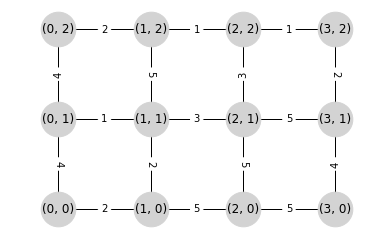

In [174]:
# 郵便配達人問題を作成
np.random.seed(1000)

G = nx.grid_2d_graph(4,3)
for (u,v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1,6)

p = {v:v for v in G.nodes()}
edge_labels = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=1200, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels = edge_labels)
plt.axis('off')

(-0.31500000000000006, 3.315, -0.21000000000000002, 2.21)

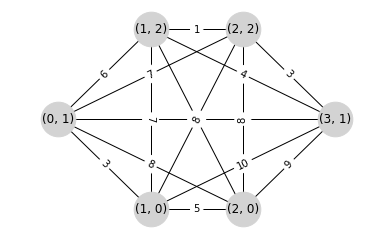

In [175]:
from itertools import combinations
# すべての奇点間の最短経路の長さを計算
Vodd = [v for v in G.nodes_iter() if G.degree(v)%2 == 1]
# dist[v1][v2]としてノード間距離を格納
dist = dict(nx.all_pairs_dijkstra_path_length(G))

# 頂点がVoddの完全グラフを作成。重みは最短経路長。
K = nx.Graph()
K_edges = [(u,v,dist[u][v]) for (u,v) in combinations(Vodd,2)]
K.add_weighted_edges_from(K_edges)

K_pos = {v:v for v in K.nodes()}
K_edge_labels = {(u,v):K[u][v]['weight'] for (u,v) in K.edges()}

nx.draw_networkx(K, pos=K_pos, node_color='lightgrey', node_size=1200, with_labels=True)
nx.draw_networkx_edge_labels(K, pos=K_pos, edge_labels = K_edge_labels)
plt.axis('off')

In [176]:
# Kの重み最小の完全マッチングを求める(重みの逆数を取って、最大完全マッチング問題を解く)
CK = K.copy()
vm = max(CK[u][v]['weight'] for (u,v) in CK.edges_iter()) #最大重みを抽出

for (u,v) in CK.edges():
    CK[u][v]['weight'] = vm - CK[u][v]['weight'] + 1

m = nx.max_weight_matching(CK, maxcardinality=True)
m 
# 本文のミス。リスト化すると特に意味のないノード列になる
#mt = list(m)
#mt # 最小完全マッチングが取れたが

{(0, 1): (1, 0),
 (1, 0): (0, 1),
 (1, 2): (2, 2),
 (2, 0): (3, 1),
 (2, 2): (1, 2),
 (3, 1): (2, 0)}

In [177]:
mm = []
for (u,v) in zip(m.keys(), m.values()):
    if (u,v) not in mm and (v,u) not in mm:
        mm.append((u,v))
mm

[((1, 2), (2, 2)), ((0, 1), (1, 0)), ((3, 1), (2, 0))]

(-0.31500000000000006, 3.315, -0.21000000000000002, 2.21)

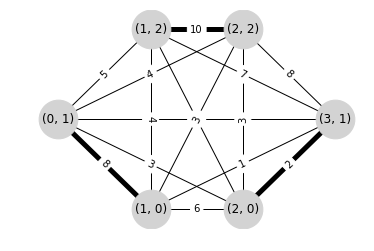

In [178]:
CK_pos = {v:v for v in CK.nodes()}
CK_edge_labels = {(u,v):CK[u][v]['weight'] for (u,v) in CK.edges()}

nx.draw_networkx(CK, pos=CK_pos, node_color='lightgrey', node_size=1500, with_labels=True)

nx.draw_networkx_edge_labels(CK, pos=CK_pos, edge_labels = CK_edge_labels)

nx.draw_networkx_edges(CK, pos=CK_pos, edgelist=mm, width=5)

plt.axis('off')

(-0.34650000000000003, 3.6464999999999996, -0.24150000000000002, 2.5415)

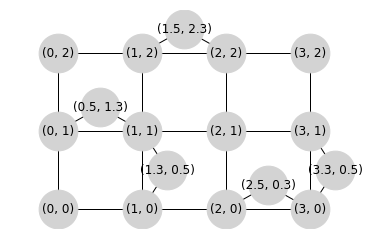

In [179]:
# マッチング（最短路）に沿って枝を重複させてオイラー閉路を求める
CG = G.copy()

# マッチングがあったEdgeについて、各Edgeの始点〜終点をつなぐ最短経路を重複させる
for (u,v) in mm:
    dp = nx.dijkstra_path(CG,u,v)
    for i in range(len(dp)-1):
        (ux,uy) = dp[i]
        (vx,vy) = dp[i+1]
        
        if ux == vx:
            wx = ux+0.3
            wy = (uy+vy)/2.0
        else:
            wx = (ux+vx)/2.0
            wy = uy+0.3
        CG.add_edges_from(
            [
                ( (ux,uy), (wx,wy) ), 
                ( (wx,wy), (vx,vy) )
            ]
        )

CG_pos = {v:v for v in CG.nodes()}

nx.draw_networkx(CG, pos=CG_pos, node_color='lightgrey', node_size=1500, with_labels=True)       
plt.axis('off')

In [193]:
# 重複経路を含むグラフ（オイラーグラフ）のオイラー閉路を作成する
# これが移動距離最小の郵便配達人の経路となる
ec = nx.eulerian_circuit(CG)
start = None
for i,(u,v) in enumerate(ec):
    if i == 0:
        start = u
    
    if i > 0 and i%10 == 0:
        print(str(u)+'->')
    else:
        print(u, end='->')
print(start)

(0, 1)->(0, 2)->(1, 2)->(1, 1)->(1, 0)->(1.3, 0.5)->(1, 1)->(2, 1)->(2, 2)->(1.5, 2.3)->(1, 2)->
(2, 2)->(3, 2)->(3, 1)->(2, 1)->(2, 0)->(2.5, 0.3)->(3, 0)->(3, 1)->(3.3, 0.5)->(3, 0)->
(2, 0)->(1, 0)->(0, 0)->(0, 1)->(1, 1)->(0.5, 1.3)->(0, 1)


# P.135 巡回セールスマン問題

In [2]:
from pulp import *
from itertools import product
MEPS = 1.0e-10

In [57]:
def TSPSolveSubtourElim(G,x,y):
    """
    """
    G = Tours

    n = len(G.nodes())
    nodes = list(G.nodes())

    edges = []
    for i,j in product(range(n), range(n)):
        if nodes[i] < nodes[j]:
            edges.append((nodes[i], nodes[j]))

    # 全てのノード間の距離を計算 
    D = np.sqrt((x.reshape(-1,1)-x)**2 + (y.reshape(-1,1)-y)**2)

    # 最適化問題に定式化
    prob = LpProblem('TSP', LpMinimize)

    X = {(u,v):LpVariable('x'+str(u)+','+str(v), 
                          lowBound=0, cat=LpBinary) for (u,v) in edges}

    # 目的関数：総距離の最小化
    prob += lpSum(D[i,j] * X[i,j] for (i,j) in edges)

    for i in nodes:
        # ノードiと隣接する全てのノードを取得
        ss = [(j,i) for j in nodes if (j,i) in edges] + [(i,j) for j in nodes if(i,j) in edges]
        # iについての全ての隣接ノードについて、x_ijの総和は2でなければならない
        prob += lpSum(X[e] for e in ss) == 2, 'Eq'+ str(i)

    prob.solve()

    # Subtourを取得
    subtours = []
    CC, subtours = get_subtours(X, G, edges, subtours)

    # Subtour除去制約を追加する
    count = 1
    print('Count=',count,':Subtours=',len(CC))
    
    while len(CC) > 1:
                 
        for S in CC:
            prob += lpSum(X[i,j] for (i,j) in edges 
                          if i in S and j in S) <= len(S)-1
        prob.solve()

        # Subtourを更新
        CC, subtours = get_subtours(X, G, edges, subtours)
        
        count += 1
        print('Count=',count,':Subtours=',len(CC))

    len_tour = 0
    for (u,v) in G.edges():
        len_tour += D[u,v]
    return len_tour

In [58]:
def get_subtours(X, G, edges, subtours=[]):
    """
    グラフからSubtourを取得して返す
    """
    MEPS = 1.0e-10
    
    # 既に登録されているSubtourを除去
    if len(subtours) > 0:
        G.remove_edges_from(subtours)

    subtours = []
    for (i,j) in edges:
        # 利用するエッジのみを抽出してグラフを作る
        if X[i,j].varValue > MEPS:
            subtours.append([i,j])
    G.add_edges_from(subtours)
    
    # Subtourを取得
    CC = list(nx.connected_components(G))
    
    return CC, subtours

Count= 1 :Subtours= 14
Count= 2 :Subtours= 6
Count= 3 :Subtours= 4
Count= 4 :Subtours= 4
Count= 5 :Subtours= 4
Count= 6 :Subtours= 2
Count= 7 :Subtours= 1
Total distance= 7892.415540059568


(-92.63499999999999, 1101.635, -98.63499999999999, 1095.635)

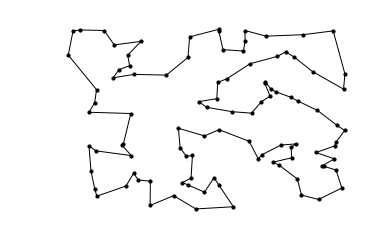

In [61]:
# ランダムなグラフを生成してTSPを解く
n = 100

vlist = [i for i in range(n)]
Tours = nx.Graph()
Tours.add_nodes_from(vlist)

x = np.random.randint(low=0, high=1000, size=n)
y = np.random.randint(low=0, high=1000, size=n)
p = {i:(x[i], y[i]) for i in range(n)}


len_tour = TSPSolveSubtourElim(G,x,y)

print('Total distance=', len_tour)
nx.draw_networkx(Tours, pos=p, node_color='k', node_size=10, with_labels=False)       
plt.axis('off')

# P.137 最大流・最小費用流問題

In [63]:
# 最大流問題
G = nx.DiGraph()
G.add_edge(1,2,capacity=4)
G.add_edge(1,3,capacity=5)
G.add_edge(2,3,capacity=2)
G.add_edge(2,4,capacity=2)
G.add_edge(3,4,capacity=2)
G.add_edge(3,5,capacity=3)
G.add_edge(4,5,capacity=4)
G.add_edge(4,6,capacity=3)
G.add_edge(5,6,capacity=5)

# グラフGのノード1から6までの最大流を求める
val,flowdict = nx.maximum_flow(G,1,6)

print('MaxFlow=',val)
for (u,v) in G.edges():
    print((u,v),':',flowdict[u][v])

MaxFlow= 7
(1, 2) : 2
(1, 3) : 5
(2, 3) : 0
(2, 4) : 2
(3, 4) : 2
(3, 5) : 3
(4, 5) : 1
(4, 6) : 3
(5, 6) : 4


{(1, 2): <matplotlib.text.Text at 0x1139eb978>,
 (1, 3): <matplotlib.text.Text at 0x1139dbd68>,
 (2, 3): <matplotlib.text.Text at 0x1139ff550>,
 (2, 4): <matplotlib.text.Text at 0x1139d4470>,
 (3, 4): <matplotlib.text.Text at 0x1139cbc88>,
 (3, 5): <matplotlib.text.Text at 0x1139d4c18>,
 (4, 5): <matplotlib.text.Text at 0x1139cb4e0>,
 (4, 6): <matplotlib.text.Text at 0x1139ffcf8>,
 (5, 6): <matplotlib.text.Text at 0x1139db6a0>}

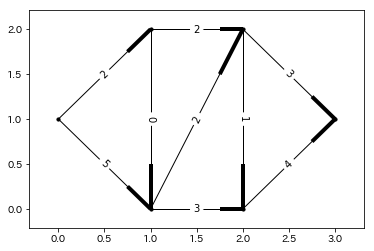

In [73]:
pos = {1:(0,1), 2:(1,2), 3:(1,0), 4:(2,2), 5:(2,0), 6:(3,1)}
edge_labels = {(u,v):flowdict[u][v] for (u,v) in G.edges()}

nx.draw_networkx(G, pos=pos, node_color='k', node_size=10, with_labels=False)  
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels, width=5)

In [74]:
# 最小カット問題
G = nx.DiGraph()
G.add_node('a', demand=-8)
G.add_node('b', demand=0)
G.add_node('c', demand=-2)
G.add_node('d', demand=10)

G.add_edge('a','b',weight=3, capacity= 3)
G.add_edge('a','c',weight=6, capacity=10)
G.add_edge('b','d',weight=1, capacity= 6)
G.add_edge('c','d',weight=4, capacity=10)
G.add_edge('c','b',weight=2, capacity= 5)

# グラフGのノード1から6までの最大流を求める
flowdict = nx.min_cost_flow(G)

print('flowdict=',flowdict)


flowdict= {'b': {'d': 6}, 'd': {}, 'c': {'d': 4, 'b': 3}, 'a': {'b': 3, 'c': 5}}


{('a', 'b'): <matplotlib.text.Text at 0x10ce7d588>,
 ('a', 'c'): <matplotlib.text.Text at 0x10ce9fa58>,
 ('b', 'd'): <matplotlib.text.Text at 0x10ce7db00>,
 ('c', 'b'): <matplotlib.text.Text at 0x10ce9ffd0>,
 ('c', 'd'): <matplotlib.text.Text at 0x10ce7ef98>}

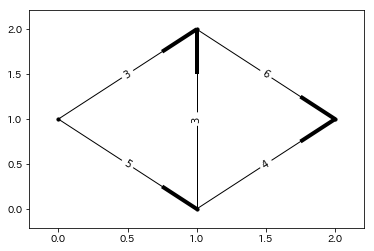

In [75]:
pos = {'a':(0,1), 'b':(1,2), 'c':(1,0), 'd':(2,1)}
edge_labels = {(u,v):flowdict[u][v] for (u,v) in G.edges()}

nx.draw_networkx(G, pos=pos, node_color='k', node_size=10, with_labels=False)  
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels, width=5)

# P.142 グラフの分割と最適化